In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install pingouin
# import pingouin as pg

     |████████████████████████████████| 219 kB 2.8 MB/s eta 0:00:01
  Created wheel for pingouin: filename=pingouin-0.3.6-py3-none-any.whl size=217879 sha256=850dddcf664faad4986f69d680c3121962eb33bd88507430761a4673d3b3a882
  Stored in directory: /root/.cache/pip/wheels/2c/1b/b4/4bb168adc02a7d28bc0b9265a5d8532ccbf140694602e76af2
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4960 sha256=f91bd7b94531375db6f873c489e5b26dfdc62020a0681ac4706c87ff54578295
  Stored in directory: /root/.cache/pip/wheels/6f/cd/a2/e49170b2cf59e88b952f3414f25a54d9f16f033bded4aaab26
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=bcf74a1991dc3e2f0abf5f645f68d17d5ae53b10e920020b475a555515ca843b
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin outdated littleutils


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
import pingouin as pg

%matplotlib inline
%config InlineBackend.figure_format='retina'

data = pd.read_csv("/kaggle/input/general-social-survey-gss-data/GSS_transformed_v1.csv")
data = data[data.year == 2018]

def transform_age(x):
    if x['age'] in ["Don't know","No answer"]:
        return -1
    elif x['age'] in ['89 or older']:
        return 89
    else: 
        return int(x['age'])

def transform_uscitzn(x):
    if x['uscitzn'] in ['A u.s. citizen','Born outside of the united states to parents who were u.s citizens at that time (if volunteered)',
                        'A u.s. citizen born in puerto rico, the u.s. virgin islands, or the northern marianas islands']:
        return 1
    elif x['uscitzn'] in ['Not a u.s. citizen']:
        return 0
    else: 
        return -1

data['age'] = data.apply(transform_age, axis=1)
data['uscitzn_ind'] = data.apply(transform_uscitzn, axis=1)

data = data[data.conrinc > 0][['id_','age','sex','race','conrinc','uscitzn','uscitzn_ind']]

In [5]:
data.shape

(1363, 7)

In [6]:
data.sex.value_counts()

Female    717
Male      646
Name: sex, dtype: int64

In [7]:
group_a = "Group A (All Men)"
group_b = "Group B (All Women)"

data_a = data[(data.sex.isin(['Male'])) & (data.conrinc > 0)]
print("{} Population -> size:{}, mean: {}, std: {} "
.format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))

data_b = data[(data.sex.isin(['Female'])) & (data.conrinc > 0)]
print("{} Population -> size:{}, mean: {}, std: {} "
.format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))

Group A (All Men) Population -> size:646, mean: 44527.22, std: 41199.96 
Group B (All Women) Population -> size:717, mean: 29862.12, std: 31593.19 


In [8]:
## EXPERIMENT-1: ALL MEN AND WOMEN

# group_a = "Group A (All Men)"
# group_b = "Group B (All Women)"

# data_a = data[(data.sex.isin(['Male'])) & (data.conrinc > 0)]
# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))

# data_b = data[(data.sex.isin(['Female'])) & (data.conrinc > 0)]
# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))


## EXPERIMENT-2: ALL WHITE MEN AND WOMEN

# group_a = "Group A (All White Men)"
# group_b = "Group B (All White Women)"

# data_a = data[(data.sex.isin(['Male'])) & (data.conrinc > 0) & (data.race.isin(['White']))]
# data_b = data[(data.sex.isin(['Female'])) & (data.conrinc > 0) & (data.race.isin(['White']))]

# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))
# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))

## EXPERIMENT-3: ALL BLACK MEN AND WOMEN

# group_a = "Group A (All Black Men)"
# group_b = "Group B (All Black Women)"

# data_a = data[(data.sex.isin(['Male'])) & (data.conrinc > 0) & (data.race.isin(['Black']))]
# data_b = data[(data.sex.isin(['Female'])) & (data.conrinc > 0) & (data.race.isin(['Black']))]

# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))
# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))


## EXPERIMENT-4: ALL IMMIGRANT MEN AND WOMEN

# group_a = "Group A (All Immigrant Men)"
# group_b = "Group B (All Immigrant Women)"

# data_a = data[(data.sex.isin(['Male'])) & (data.conrinc > 0) & (data.uscitzn_ind == 0)]
# data_b = data[(data.sex.isin(['Female'])) & (data.conrinc > 0) & (data.uscitzn_ind == 0)]

# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))
# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))


## EXPERIMENT-5: ALL YOUNG ADULT (MILLENIEAL'S AGE 20-35) MEN AND WOMEN

# group_a = "Group A (All Milenneal Men of age 20-38)"
# group_b = "Group B (All Milenneal Women of age 20-38)"

# data_a = data[(data.sex.isin(['Male'])) & (data.conrinc > 0) & (data.age.between(20,38))]
# data_b = data[(data.sex.isin(['Female'])) & (data.conrinc > 0) & (data.age.between(20,38))]

# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))
# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))


## EXPERIMENT-6: ALL MIDDLE-AGED ADULT (AGE 39-59) MEN AND WOMEN

# group_a = "Group A (All Men of age 39-59)"
# group_b = "Group B (All Women of age 39-59)"

# data_a = data[(data.sex.isin(['Male'])) & (data.conrinc > 0) & (data.age.between(39,59))]
# data_b = data[(data.sex.isin(['Female'])) & (data.conrinc > 0) & (data.age.between(39,59))]

# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))
# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))

## EXPERIMENT-7: ALL OLD-AGED ADULT (AGE 60+) MEN AND WOMEN

# group_a = "Group A (All Men of age 60+)"
# group_b = "Group B (All Women of age 60+)"

# data_a = data[(data.sex.isin(['Male'])) & (data.conrinc > 0) & (data.age >= 60)]
# data_b = data[(data.sex.isin(['Female'])) & (data.conrinc > 0) & (data.age >= 60)]

# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))
# print("{} Population -> size:{}, mean: {}, std: {} "
# .format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))


### Population Distribution

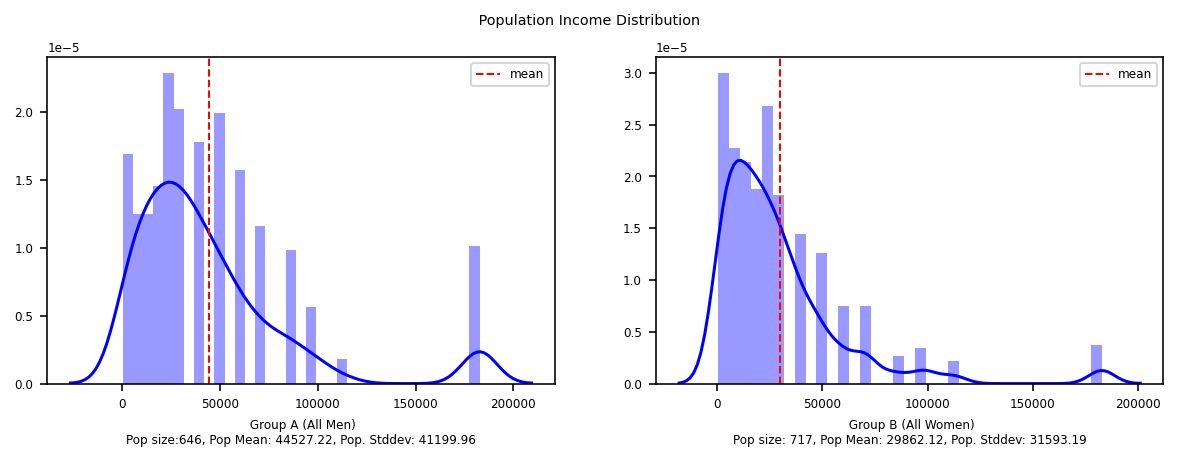

In [9]:
plt.rcParams['font.size'] = 6
plt.figure(figsize=(10, 3))
plt.suptitle(""" Population Income Distribution""")

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.distplot(data_a.conrinc, hist=True, color="b", bins=35)
plt.axvline(x=data_a.conrinc.mean(), linewidth=1, ls = "--",color='r', label="mean")
plt.legend(["mean"])
plt.xlabel(""" {}
Pop size:{}, Pop Mean: {}, Pop. Stddev: {}""".format(group_a, len(data_a), round(data_a.conrinc.mean(),2), round(data_a.conrinc.std(),2)))

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(data_b.conrinc, hist=True, color="b", bins=35)
plt.axvline(x=data_b.conrinc.mean(), linewidth=1, ls = "--",color='r', label="mean")
plt.legend(["mean"])
plt.xlabel(""" {}
Pop size: {}, Pop Mean: {}, Pop. Stddev: {}""".format(group_b, len(data_b), round(data_b.conrinc.mean(),2), round(data_b.conrinc.std(),2)))

plt.show()

### Sample size

In [10]:
import math
import scipy.stats as ss

def calc_sample_size(population_size, confidence_level, margin_error):
    alpha = 1 - (confidence_level)
    Z = ss.norm.ppf(1 - (alpha/2))
    p = 0.5
    e = margin_error
    N = population_size
    
    # Calc sample size 
    # Cochran’s Sample Size Formula
    n_0 = ((Z**2) * p * (1-p)) / (e**2)
    
    # Adjustment for finite population
    n = n_0 / (1 + ((n_0 - 1) / float(N)) )

    return int(math.ceil(n))

In [11]:
sample_size_for_group_a = calc_sample_size(len(data_a), 0.95, 0.05)
sample_size_for_group_b = calc_sample_size(len(data_b), 0.95, 0.05)

print(sample_size_for_group_a, sample_size_for_group_b)

242 251


### Sampling Distributions

In [12]:
def create_sample_distributions(pop_data, sample_size):
    sample = []
    for i in range(1000):
        sample_mean = (pop_data.sample(n=sample_size, replace=True).conrinc.mean())
        sample.append(sample_mean)
    sample = np.asarray(sample)
    return sample

In [13]:
data_a_sample = create_sample_distributions(data_a, sample_size_for_group_a)
data_a_sample = np.asarray(data_a_sample)

data_b_sample = create_sample_distributions(data_b, sample_size_for_group_b)
data_b_sample = np.asarray(data_b_sample)

standard_error_for_group_a = round((data_a.conrinc.std()/np.sqrt(sample_size_for_group_a)),2)
standard_error_for_group_b = round((data_b.conrinc.std()/np.sqrt(sample_size_for_group_b)),2)

In [14]:
# ## HISTOGRAM FOR SAMPLING DISTRIBUTION

# plt.rcParams['font.size'] = 6
# plt.figure(figsize=(10, 3))
# plt.suptitle(""" Sample Means Income Distribution""")

# ax1 = plt.subplot(1, 2, 1)
# ax1 = sns.distplot(data_a_sample, hist=True, color="g", bins=35)
# plt.axvline(x=data_a_sample.mean(), linewidth=1, ls = "--",color='r', label="mean")
# plt.legend(["mean"])
# plt.xlabel("""{} 
# Sample size: {}, Std error: {}, Sample Mean: {}, Sample Stddev: {}""".format(group_a, sample_size_for_group_a, standard_error_for_group_a,
# round(data_a_sample.mean(),2), round(data_a_sample.std(),2)))

# ax2 = plt.subplot(1, 2, 2)
# ax2 = sns.distplot(data_b_sample, hist=True, color="g", bins=35)
# plt.axvline(x=data_b_sample.mean(), linewidth=1, ls = "--",color='r', label="mean")
# plt.legend(["mean"])
# plt.xlabel("""{} 
# Sample size: {}, Std error: {}, Sample Mean: {}, Sample Stddev: {}""".format(group_b, sample_size_for_group_b, standard_error_for_group_b,
# round(data_b_sample.mean(),2), round(data_b_sample.std(),2)))

# plt.show()

In [15]:
standard_error_for_group_a = round((data_a.conrinc.std()/np.sqrt(sample_size_for_group_a)),2)
standard_error_for_group_b = round((data_b.conrinc.std()/np.sqrt(sample_size_for_group_b)),2)

print("""{} Sampling distribution:
Standard Error for n={}: {}, Mean Income: {}, Standard Deviation: {}"""
.format(group_a, sample_size_for_group_a, standard_error_for_group_a, round(data_a_sample.mean(),2), round(data_a_sample.std(),2)))

print("""{} Sampling distribution:
Standard Error for n={}: {}, Mean Income: {}, Standard Deviation: {}"""
.format(group_b, sample_size_for_group_b, standard_error_for_group_b, round(data_b_sample.mean(),2), round(data_b_sample.std(),2)))

print('Difference in means: ', round(data_a_sample.mean() - data_b_sample.mean(),2))
print("Group B mean is {}% of Group A mean".format(round(data_b_sample.mean()/data_a_sample.mean() * 100, 1)))

Group A (All Men) Sampling distribution:
Standard Error for n=242: 2648.43, Mean Income: 44558.87, Standard Deviation: 2667.94
Group B (All Women) Sampling distribution:
Standard Error for n=251: 1994.14, Mean Income: 29852.1, Standard Deviation: 1973.23
Difference in means:  14706.77
Group B mean is 67.0% of Group A mean


### t-Test

In [16]:
from scipy.stats import t, ttest_ind

alpha = 0.05
ttest_result = ttest_ind(data_a_sample, data_b_sample)
degree_freedom = len(data_a_sample) + len(data_b_sample) - 2
critical_value = t.ppf(1 - alpha, degree_freedom)

print("""t-Test with aplha={} for independent samples, {} and {}:""".format(alpha, group_a, group_b))
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (ttest_result.statistic, degree_freedom, critical_value, ttest_result.pvalue))

t-Test with aplha=0.05 for independent samples, Group A (All Men) and Group B (All Women):
t=140.080, df=1998, cv=1.646, p=0.000


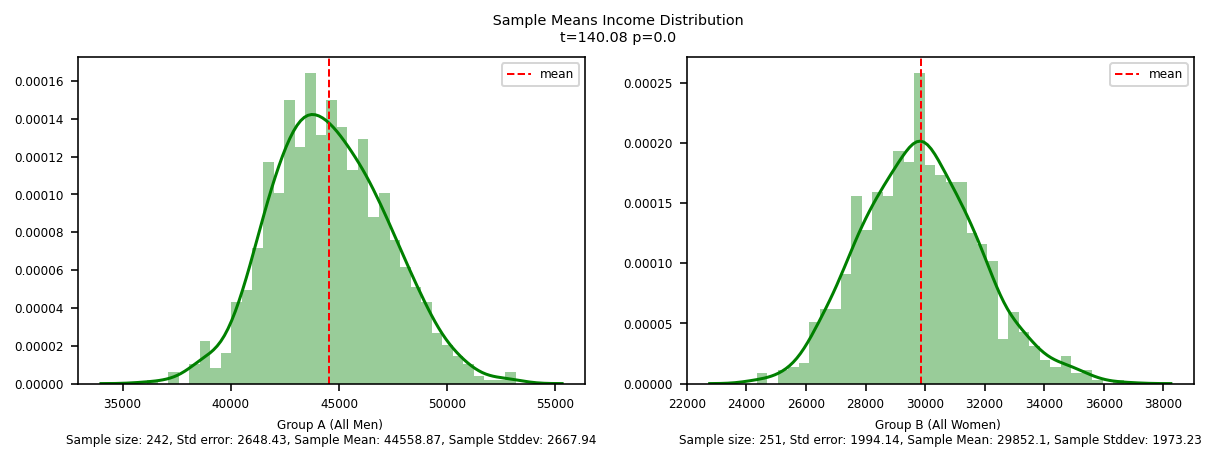

In [17]:
## HISTOGRAM FOR SAMPLING DISTRIBUTION

plt.rcParams['font.size'] = 6
plt.figure(figsize=(10, 3))
plt.suptitle(""" Sample Means Income Distribution 
t={} p={}
""".format(round(ttest_result.statistic,2), round(ttest_result.pvalue,2)))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.distplot(data_a_sample, hist=True, color="g", bins=35)
plt.axvline(x=data_a_sample.mean(), linewidth=1, ls = "--",color='r', label="mean")
plt.legend(["mean"])
plt.xlabel("""{} 
Sample size: {}, Std error: {}, Sample Mean: {}, Sample Stddev: {}""".format(group_a, sample_size_for_group_a, standard_error_for_group_a,
round(data_a_sample.mean(),2), round(data_a_sample.std(),2)))

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(data_b_sample, hist=True, color="g", bins=35)
plt.axvline(x=data_b_sample.mean(), linewidth=1, ls = "--",color='r', label="mean")
plt.legend(["mean"])
plt.xlabel("""{} 
Sample size: {}, Std error: {}, Sample Mean: {}, Sample Stddev: {}""".format(group_b, sample_size_for_group_b, standard_error_for_group_b,
round(data_b_sample.mean(),2), round(data_b_sample.std(),2)))

plt.show()

In [18]:
import pingouin as pg
model = pg.ttest(data_a_sample, data_b_sample)  # output is a pandas dataframe
model.head()

/opt/conda/lib/python3.7/site-packages/pingouin/bayesian.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,140.07974,1998,two-sided,0.0,"[14500.87, 14912.67]",6.264556,inf,1.0


### Calculate Confidence interval for Difference of means

In [21]:
n1 = sample_size_for_group_a
n2 = sample_size_for_group_b

mean_male = data_a_sample.mean()
mean_female = data_b_sample.mean()

sd_male = data_a_sample.std()
sd_female = data_b_sample.std() 

se_male = sd_male / np.sqrt(sample_size_for_group_a)
se_female = sd_female / np.sqrt(sample_size_for_group_b)

mean_d = mean_male - mean_female

sem_d = (np.sqrt((n1-1)*se_male**2 + (n2-1)*se_female**2)/(n1+n2-2))*(np.sqrt(1/n1 + 1/n2))

lcb = mean_d - 1.96*sem_d
ucb = mean_d + 1.96*sem_d

print("({},{})".format(round(lcb,2), round(ucb,2)))

(14705.58,14707.96)
